## CLUSTERING SET-UP

In [1]:
# SUPPRESS WARNING

import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NumbaDeprecationWarning)

In [2]:
from src.data.data_parser import WorkflowsImport, OrdersImport
from src.helpers.feature_encoder import WORKFLOW_FEATURES, ORDER_FEATURES
from src.clustering.clustering import ClusteringObjective

# IMPORT DATA
WORKFLOWS = WorkflowsImport.IMPORT_FROM_CSV()
WORKFLOWS_DB = WorkflowsImport.IMPORT_FROM_DB()
ORDERS = OrdersImport.IMPORT_FROM_CSV()

# DEFINE TYPE OF OBJECTS THAT ARE GOING TO BE CLUSTERED
CLUSTERING_OBJECTIVE = ClusteringObjective.WORKFLOWS

# DEFINE FEATURES DISPLAYED IN ANALYSIS
WORKFLOWS_DISPLAYABLE_DETAILS = [
    WORKFLOW_FEATURES.CPU, 
    WORKFLOW_FEATURES.MEMORY, 
    WORKFLOW_FEATURES.EPHEMERAL_STORAGE, 
    WORKFLOW_FEATURES.STORAGE, 
    WORKFLOW_FEATURES.PROCESSED_SIZE,
    WORKFLOW_FEATURES.DURATION,
    WORKFLOW_FEATURES.STEPS_NO, 
    WORKFLOW_FEATURES.PRIORITY
]

ORDERS_DISPLAYABLE_DETAILS = [
    ORDER_FEATURES.CPU, 
    ORDER_FEATURES.MEMORY, 
    ORDER_FEATURES.EPHEMERAL_STORAGE, 
    ORDER_FEATURES.STORAGE, 
    ORDER_FEATURES.PROCESSED_SIZE,
    ORDER_FEATURES.DURATION,
    ORDER_FEATURES.WORKFLOW_NO,
    ORDER_FEATURES.ORDER_STATUS_CODE,
    ORDER_FEATURES.ORDER_NAME_CODE
]

DISPLAYABLE_DETAILS = WORKFLOWS_DISPLAYABLE_DETAILS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDERS_DISPLAYABLE_DETAILS

In [ ]:
# EXPLORATORY ANALYSIS SECTION
from src.exploratory.exploratory_analysis import ExploratoryAnalysis

exploratory = ExploratoryAnalysis(WORKFLOWS, WORKFLOWS_DB, DISPLAYABLE_DETAILS, True)
exploratory.run_all()

In [4]:
# DATA AUGMENTATION SECTION
from src.augmentation.data_augmentation import AugmentWorkflows

DIR_NAME_NO_DOWNLOADS = 'k-means-without-download'
FILE_NAME_NO_DOWNLOADS = 'k-means-without-download-output-labels.csv'

DIR_NAME_DOWNLOADS = 'k-means-only-download'
FILE_NAME_DOWNLOADS = 'k-means-only-download-output-labels.csv'

LABELS_WITHOUT_DOWNLOAD = [0, 1, 2, 5]
LABELS_DOWNLOAD = [0, 1, 2, 3, 5, 6, 7, 8]

SIZES_WITHOUT_DOWNLOAD = [50, 50, 50, 50]
SIZES_DOWNLOAD = [10, 10, 10, 10, 10, 10, 10, 10]

WORKFLOWS_NO_DOWNLOADS = WorkflowsImport.IMPORT_FROM_FILE(DIR_NAME_NO_DOWNLOADS, FILE_NAME_NO_DOWNLOADS)
WORKFLOWS_DOWNLOADS = WorkflowsImport.IMPORT_FROM_FILE(DIR_NAME_DOWNLOADS, FILE_NAME_DOWNLOADS)

AugmentWorkflows([WORKFLOWS_NO_DOWNLOADS, WORKFLOWS_DOWNLOADS], 
                 [LABELS_WITHOUT_DOWNLOAD, LABELS_DOWNLOAD], 
                 [SIZES_WITHOUT_DOWNLOAD, SIZES_DOWNLOAD]).run_and_save()

In [17]:
from src.clustering.clustering_evaluation import ClusteringMetrics
from src.clustering.clustering_pre_processing import ClusteringPreProcessing
from src.helpers.dimensionality_reducer import DimensionalityReducer
from src.clustering.clustering_methods import ClusteringMethod
from src.helpers.feature_encoder import WORKFLOW_FEATURES, ORDER_FEATURES

# DEFINE CLUSTERING PARAMETERS
CLUSTERING_DATA = WORKFLOWS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDERS 
CLUSTERING_METHOD = ClusteringMethod.K_MEANS
CLUSTERING_PARAMS = [9]

# SPECIFY PRE-PROCESSING OPERATIONS
REDUCTION_PARAMS = ()
DIMENSIONALITY_REDUCTION = DimensionalityReducer.PCA
PRE_PROCESSING_OPERATIONS = [
    ClusteringPreProcessing.ONLY_DB_RECORDS, 
    ClusteringPreProcessing.MERGE_STATUSES,
    ClusteringPreProcessing.FILTER_TEST_WORKFLOWS,
    ClusteringPreProcessing.TAKE_ONLY_DOWNLOAD_WORKFLOWS
]

# DEFINE FEATURES USED IN CLUSTERING
WORKFLOWS_CLUSTERING_DETAILS = [
    WORKFLOW_FEATURES.DURATION,
    WORKFLOW_FEATURES.MEMORY,
    WORKFLOW_FEATURES.EPHEMERAL_STORAGE,
    WORKFLOW_FEATURES.STORAGE,
    WORKFLOW_FEATURES.PROCESSED_SIZE,
    WORKFLOW_FEATURES.EXECUTED_STEPS_NO,
    WORKFLOW_FEATURES.ARGO_STATUS_CODE,
    WORKFLOW_FEATURES.ARGO_OUTPUT_MSG_CODE,
    WORKFLOW_FEATURES.PROCESSOR_TYPE_CODE
]

ORDER_CLUSTERING_DETAILS = [
    ORDER_FEATURES.DURATION,
    ORDER_FEATURES.MEMORY,
    ORDER_FEATURES.WORKFLOW_NO,
    ORDER_FEATURES.EPHEMERAL_STORAGE,
    ORDER_FEATURES.STORAGE,
    ORDER_FEATURES.PROCESSED_SIZE,
    ORDER_FEATURES.ORDER_STATUS_CODE
]

CLUSTERING_DETAILS = WORKFLOWS_CLUSTERING_DETAILS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDER_CLUSTERING_DETAILS

# DEFINE EVALUATION METRICS
VALIDATION_METRICS = [ClusteringMetrics.SILHOUETTE, ClusteringMetrics.CALINSKI, ClusteringMetrics.DAVIES]

# SPECIFY IF CLUSTERING TEST SHOULD BE RUN
TEST_PARAMETERS = False

CLUSTERING_NAME = f'K-Means only download'

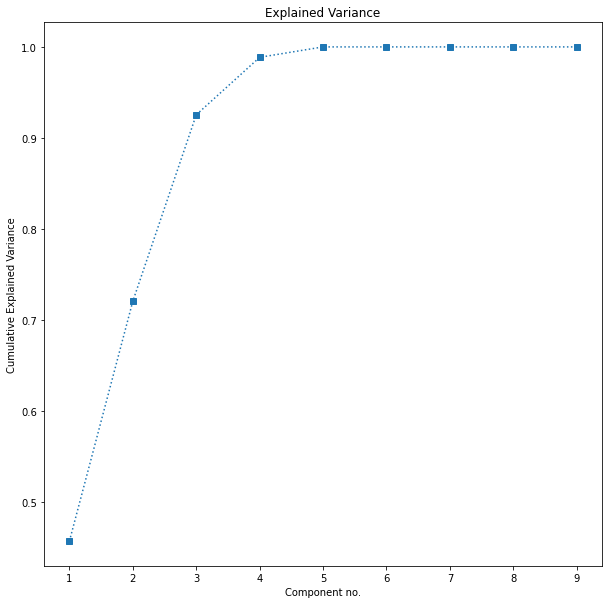

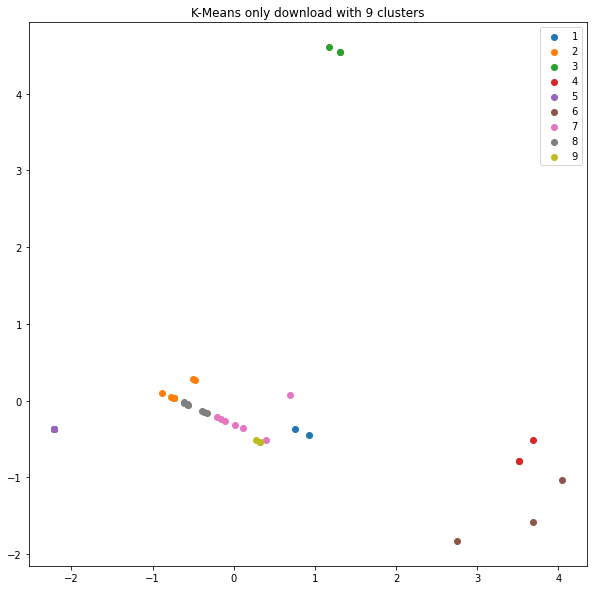

,uid,order_name,order_id,status,order_status,argo_status,argo_detailed_status,argo_output_message,processor_name,cpu,...,status_code,order_status_code,argo_status_code,argo_detailed_status_code,argo_output_message_code,processor_name_code,workflow_steps_encoded_code,nodes_per_step_encoded_code,status_per_step_encoded_code,label
182,013109e7-e2f8-4c5b-8943-d858c30be2bc,S1A_IW_RAW__0SDV_20201024T123422_20201024T1234...,1482515,done,done,Succeeded,undefined,product processed successfully,download,349612,...,1,2,0.0,0,2.0,5.0,8,177,8,8
538,039bc714-3945-48b7-8724-739b0c4a570a,S1A_IW_RAW__0SDV_20201024T123357_20201024T1234...,1482516,done,done,Succeeded,undefined,product processed successfully,download,349670,...,1,2,0.0,0,2.0,5.0,8,499,8,8
2631,10c5232d-a97a-41c4-a91f-05701bf0ed7d,S1A_EW_RAW__0SDH_20201013T062517_20201013T0625...,1475323,done,done,Succeeded,undefined,product processed successfully,download,6655,...,1,2,0.0,0,2.0,5.0,8,2351,8,1
3097,1390ad91-2515-405d-94fc-b02e0a67725f,S1B_EW_RAW__0SDH_20201020T052300_20201020T0524...,1477489,done,done,Succeeded,undefined,product processed successfully,download,12694,...,1,2,0.0,0,2.0,5.0,8,2746,8,1
3132,13c768db-3762-4e30-a651-0737ab3fc66b,S1A_IW_SLC__1SDV_20201009T121000_20201009T1210...,1472743,done,done,Succeeded,undefined,product processed successfully,download,91153,...,1,2,0.0,0,2.0,5.0,8,2774,8,6
3303,14c4c6b3-a638-4407-b905-c79aa13d23b3,S1A_IW_RAW__0SDV_20201007T232419_20201007T2324...,1471982,done,done,Succeeded,undefined,product processed successfully,download,1166544,...,1,2,0.0,0,2.0,5.0,8,2927,8,3
4331,1b34cb38-b195-4885-8d48-bc02d4e72460,S1A_IW_RAW__0SDV_20201007T232444_20201007T2325...,1471981,done,done,Succeeded,undefined,product processed successfully,download,1165437,...,1,2,0.0,0,2.0,5.0,8,3789,8,3
4726,1db57339-92f4-4c3f-a926-d35084234f1a,S1A_IW_RAW__0SDV_20201007T232509_20201007T2325...,1471980,done,done,Succeeded,undefined,product processed successfully,download,1163354,...,1,2,0.0,0,2.0,5.0,8,4113,8,3
4879,1e9d34bf-e7ea-4490-be85-ae6c9cae4e29,S1B_IW_RAW__0SDV_20201002T230002_20201002T2300...,1468612,done,done,Succeeded,undefined,product processed successfully,download,8940,...,1,2,0.0,0,2.0,5.0,8,4245,8,7
5327,213cdfa0-9c3c-4714-af15-f135c98a5ba5,S1B_IW_SLC__1SDH_20201017T123738_20201017T1238...,1477391,done,done,Succeeded,undefined,product processed successfully,download,8664,...,1,2,0.0,0,2.0,5.0,8,4618,8,6



Cluster no. 9
Silhouette Score: 0.6969000223311103
Calinski-Harabasz Score: 295.50354269142247
Davies-Bouldin Score: 0.4018365949251492


Cluster 1 (size: 2):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,297424,3140298,0,0,3398390392,154760,3,1
std,159,1308,0,0,506567369,74,0,0
min,297312,3139373,0,0,3040193170,154707,3,1
max,297537,3141223,0,0,3756587614,154812,3,1
cov,0.000535,0.000417,0.0,0.0,0.149061,0.000478,0.0,0.0



Count per status:


,0
status,
done,2



Count per order status:


,0
order_status,
done,2



Count per argo status:


,0
argo_status,
Succeeded,2



Count per argo output message:


,0
argo_output_message,
product processed successfully,2



Count per processor name:


,0
processor_name,
download,2



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,2



Count per processor name and status:


,,0
processor_name,status,
download,done,2




Cluster 2 (size: 8):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,12410,130860,0,0,949794797,6276,3,1
std,6702,70801,0,0,209551721,3350,0,0
min,6655,70106,0,0,474172009,3368,3,1
max,27290,288041,0,0,1090606161,13690,3,1
cov,0.540048,0.541044,0.0,0.0,0.220628,0.533779,0.0,0.0



Count per status:


,0
status,
done,8



Count per order status:


,0
order_status,
done,8



Count per argo status:


,0
argo_status,
Succeeded,8



Count per argo output message:


,0
argo_output_message,
product processed successfully,8



Count per processor name:


,0
processor_name,
download,8



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,8



Count per processor name and status:


,,0
processor_name,status,
download,done,8




Cluster 3 (size: 3):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,7218,75667,0,0,1419637662,12938,3,1
std,68,742,0,0,340539785,33,0,0
min,7178,75220,0,0,1026927621,12915,3,1
max,7296,76524,0,0,1633355381,12976,3,1
cov,0.009421,0.009806,0.0,0.0,0.239878,0.002551,0.0,0.0



Count per status:


,0
status,
done,3



Count per order status:


,0
order_status,
done,3



Count per argo status:


,0
argo_status,
Failed,3



Count per argo output message:


,0
argo_output_message,
product processed successfully,3



Count per processor name:


,0
processor_name,
download,3



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,no more retries left,3



Count per processor name and status:


,,0
processor_name,status,
download,done,3




Cluster 4 (size: 3):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,1165112,12302946,0,0,1519763483,584052,3,1
std,1620,17010,0,0,138730710,360,0,0
min,1163354,12284475,0,0,1359589762,583777,3,1
max,1166544,12317964,0,0,1601970285,584460,3,1
cov,0.00139,0.001383,0.0,0.0,0.091284,0.000616,0.0,0.0



Count per status:


,0
status,
done,3



Count per order status:


,0
order_status,
done,3



Count per argo status:


,0
argo_status,
Succeeded,3



Count per argo output message:


,0
argo_output_message,
product processed successfully,3



Count per processor name:


,0
processor_name,
download,3



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,3



Count per processor name and status:


,,0
processor_name,status,
download,done,3




Cluster 5 (size: 8):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,18,28,0,0,0,58,2,1
std,6,19,0,0,0,14,0,0
min,10,6,0,0,0,40,2,1
max,29,56,0,0,0,83,2,1
cov,0.333333,0.678571,0.0,0.0,0.0,0.241379,0.0,0.0



Count per status:


,0
status,
failed,8



Count per order status:


,0
order_status,
done_with_errors,8



Count per argo status:


,0
argo_status,
Succeeded,8



Count per argo output message:


,0
argo_output_message,
requested product does not exist.,8



Count per processor name:


,0
processor_name,
download,8



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,failed,requested product does not exist.,undefined,8



Count per processor name and status:


,,0
processor_name,status,
download,failed,8




Cluster 6 (size: 3):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,1111009,11731532,0,0,4219902757,556145,3,1
std,80627,851301,0,0,258160087,40687,0,0
min,1017914,10748594,0,0,3997064435,509163,3,1
max,1158421,12232315,0,0,4502797695,579644,3,1
cov,0.072571,0.072565,0.0,0.0,0.061177,0.073159,0.0,0.0



Count per status:


,0
status,
done,3



Count per order status:


,0
order_status,
done,3



Count per argo status:


,0
argo_status,
Succeeded,3



Count per argo output message:


,0
argo_output_message,
product processed successfully,3



Count per processor name:


,0
processor_name,
download,3



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,3



Count per processor name and status:


,,0
processor_name,status,
download,done,3




Cluster 7 (size: 7):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,31382,331042,0,0,4199257654,16642,3,1
std,37258,393569,0,0,611708722,19957,0,0
min,8461,89216,0,0,3401097269,4280,3,1
max,91153,962145,0,0,5045997643,45880,3,1
cov,1.187241,1.188879,0.0,0.0,0.145671,1.199195,0.0,0.0



Count per status:


,0
status,
done,7



Count per order status:


,0
order_status,
done,7



Count per argo status:


,0
argo_status,
Succeeded,7



Count per argo output message:


,0
argo_output_message,
product processed successfully,7



Count per processor name:


,0
processor_name,
download,7



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,7



Count per processor name and status:


,,0
processor_name,status,
download,done,7




Cluster 8 (size: 10):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,19721,208072,0,0,1912381866,9909,3,1
std,12057,127344,0,0,360023829,6030,0,0
min,6918,72834,0,0,1614057374,3508,3,1
max,33344,351891,0,0,2566577207,16732,3,1
cov,0.611379,0.612019,0.0,0.0,0.188259,0.608538,0.0,0.0



Count per status:


,0
status,
done,10



Count per order status:


,0
order_status,
done,10



Count per argo status:


,0
argo_status,
Succeeded,10



Count per argo output message:


,0
argo_output_message,
product processed successfully,10



Count per processor name:


,0
processor_name,
download,10



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,10



Count per processor name and status:


,,0
processor_name,status,
download,done,10




Cluster 9 (size: 3):


,cpu,memory,ephemeral_storage,storage,processed_size,duration,initial_steps_no,priority
mean,349635,3691862,0,0,1524417817,174906,3,1
std,31,349,0,0,114935545,15,0,0
min,349612,3691583,0,0,1393085255,174896,3,1
max,349670,3692253,0,0,1606636990,174923,3,1
cov,0.000089,0.000095,0.0,0.0,0.075396,0.000086,0.0,0.0



Count per status:


,0
status,
done,3



Count per order status:


,0
order_status,
done,3



Count per argo status:


,0
argo_status,
Succeeded,3



Count per argo output message:


,0
argo_output_message,
product processed successfully,3



Count per processor name:


,0
processor_name,
download,3



Count per processor name and status and argo output message and argo detailed status:


,,,,0
processor_name,status,argo_output_message,argo_detailed_status,
download,done,product processed successfully,undefined,3



Count per processor name and status:


,,0
processor_name,status,
download,done,3


In [18]:
# CLUSTERING SECTION
from src.clustering.clustering import Clustering

clustering = Clustering(CLUSTERING_NAME, 
                        CLUSTERING_DATA, 
                        CLUSTERING_DETAILS, 
                        DISPLAYABLE_DETAILS, 
                        CLUSTERING_METHOD, 
                        VALIDATION_METRICS, 
                        DIMENSIONALITY_REDUCTION, 
                        CLUSTERING_OBJECTIVE,
                        PRE_PROCESSING_OPERATIONS)
clustering.run(CLUSTERING_PARAMS, REDUCTION_PARAMS, test_params=TEST_PARAMETERS)